# Table Creation and Data Loading Starter Guide  

Building out a project? Are you at an exploratory phase where you have data in various files, unsure of what it contains and what columns will ultimately be useful in your data model? Or do you have a robust understanding of what you need in your data model and are ready to define your tables, even if the data is not yet ready?  

Depending on your project, there are a few ways to create tables and load them with data.  Read on for a quick explanation of your options and when it would make sense to use them.  

💡 **Note:** Want more details? Visit Atoti Python SDK's [documentation](https://docs.atoti.io/) for more information on anything referenced below.  

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=table-creation-and-data-loads" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Try Atoti"></a></div>

We'll keep this example straightfoward, working with CSVs and dataframes alone. This means we'll only need Atoti and Pandas for this demonstration and can create a no frills session.

In [1]:
import atoti
import pandas

session = atoti.Session.start()

## Creating tables

There are two ways we can create tables in Atoti Python SDK.

### Create and load

If we are in the data exploratory phase with our analysis, we can quickly create a table and load data into it in one fell swoop using one of the `read_*` functions. For example, [`read_csv()`](https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv) is used below. This will create a table and load in data based on what is already present. In our example, we have a CSV with order data.

In [2]:
orders = session.read_csv(
    "s3://data.atoti.io/notebooks/table-creation-and-data-loads/data/Orders.csv",
    table_name="Orders",
    keys=["OrderId"],
    data_types={
        "OrderId": atoti.STRING,
        "ProductId": atoti.STRING,
        "EmployeeId": atoti.STRING,
        "CustomerId": atoti.STRING,
    },
)

In [3]:
orders.head()

,OrderDate,QuantitySold,SellingPricePerUnit,ShipperName,ProductId,EmployeeId,CustomerId
OrderId,,,,,,,
13,18/2/2019,233,32.01,Federal Shipping,1358,18551,c4859
27,18/2/2019,749,21.96,Rapid Post,1514,26584,c4747
41,18/2/2019,454,11.73,Freight United,773,98635,c2675
55,18/2/2019,2,32.18,Speedy Express,1137,18336,c1275
69,18/2/2019,672,56.04,Speedy Express,591,26584,c3067


🗒️ It is a good idea to set the datatype of ID columns, though it is not necessary to do so.  

There are other arguments we can set, including things like the table name, column mapping, and date patterns for date columns. These are not required, but can be set if we know something about the underlying data and what we ultimately want in our data model. Otherwise, these arguments will take on the specified default values outlined in its [documentation](https://docs.atoti.io/latest/api/atoti.Session.read_csv.html#atoti.Session.read_csv), or, for arguments like _types_, be inferred based on a sample of the available data.  

Let's try this with our product data. We'll set _types_, but not _keys_.  

In [4]:
products = session.read_csv(
    "s3://data.atoti.io/notebooks/table-creation-and-data-loads/data/Products.csv",
    table_name="Products",
    data_types={
        "ProductId": atoti.STRING,
    },
)

🗒️ Like _keys_, defining _types_ is optional. We'll explore the benefits of setting up _keys_ throughout this explainer.  

In fact, the only required argument for `read_csv()` is the path to where our CSV is stored (or CSVs, since this accepts a [glob pattern](https://en.wikipedia.org/wiki/Glob_(programming))).  

🗒️ If using a glob pattern, then we'll need to set _table_name_.  

There is nothing special about CSVs. We can just as easily read from a dataframe. To demonstrate, we'll create a simple dataframe. This dataframe provides a contact name for each shipper. We'll use [`read_pandas()`](https://docs.atoti.io/latest/api/atoti.Session.read_pandas.html#atoti.Session.read_pandas) to create a table and load in the data present in the dataframe.  

In [5]:
shipper_df = pandas.DataFrame(
    data={
        "ShipperName": [
            "Freight United",
            "Rapid Post",
            "United Package",
            "Speedy Express",
            "The Transporter",
            "Federal Shipping",
        ],
        "Contact": [
            "Geoff Matthews",
            "Payal Shah",
            "Junqi Huang",
            "Natalia Ramirez",
            "Funmi Odunga",
            "Liz Welds",
        ],
    },
)

In [6]:
shipperContact = session.read_pandas(shipper_df, table_name="ShipperContact")

🗒️ Like before, defining _keys_ is optional to do. In fact, we did not set any in this example.  

In [7]:
shipperContact.head()

,ShipperName,Contact
0,Freight United,Geoff Matthews
1,Federal Shipping,Liz Welds
2,Rapid Post,Payal Shah
3,The Transporter,Funmi Odunga
4,United Package,Junqi Huang


### Create then load

Often, our data modeling and our data loading steps cannot or should not be combined. For example, we may know what data model we need, but we don't have the data yet. In this case, we can go ahead and create the tables we want, specifying things like the name of the table, what columns and types of data it will have, and what defines its primary key index.

#### Creating tables

We'll create two tables using [`create_table()`](https://docs.atoti.io/latest/api/atoti.Session.create_table.html#atoti.Session.create_table), one for employee data and one for customer data.

In [8]:
customers = session.create_table(
    "Customers",
    data_types={
        "CustomerId": atoti.STRING,
        "CompanyName": atoti.STRING,
        "Region": atoti.STRING,
        "Country": atoti.STRING,
        "Address": atoti.STRING,
        "City": atoti.STRING,
        "PostCode": atoti.STRING,
        "Phone": atoti.STRING,
    },
    keys=["CustomerId"],
)

In [9]:
employees = session.create_table(
    "Employees",
    data_types={
        "EmployeeId": atoti.STRING,
        "EmployeeName": atoti.STRING,
        "EmployeeCountry": atoti.STRING,
        "EmployeeCity": atoti.STRING,
    },
    keys=["EmployeeId"],
)

🗒️ Like before, _keys_ are not required, though a good idea to set.

#### Loading data  

The tables we created make no mention of where the data will be coming from. This gives us flexibility to create our data model and separately source and prepare our data before loading it. For example, if we have our customer data in a CSV file, we can use [`load_csv()`](https://docs.atoti.io/latest/api/atoti.Table.load_csv.html#atoti.Table.load_csv) to add data whenever that data is available. Let's first take a look at a screenshot of the data we're loading in.  

<img src="https://s3.eu-west-3.amazonaws.com/data.atoti.io/notebooks/table-creation-and-data-loads/images/customer-csv.png"></a></div>  

Two issues might come up:  
1. Our CSV has one more column than we modeled: it includes a _Subregion_ which we never accounted for in the data model  
2. The CSV has a column called _PostCode_ instead of _PostalCode_  

We could (and likely would) clean this data up before loading, but for the sake of exploring this, let's leave it and see what happens.  

In [10]:
customers.load(
    atoti.CsvLoad(
        "s3://data.atoti.io/notebooks/table-creation-and-data-loads/data/Customers.csv"
    )
)

In [11]:
customers.head()

,CompanyName,Region,Country,Address,City,PostCode,Phone
CustomerId,,,,,,,
c3571,Bon app',Europe,France,"12, rue des Bouchers",Marseille,N/A,91.24.45.40
c4075,Drachenblut Delikatessen,Europe,Germany,Walserweg 21,Aachen,N/A,0241-039123
c4243,Galería del gastrónomo,Europe,Spain,"Rambla de Cataluña, 23",Barcelona,N/A,(93) 203 4560
c5083,Laughing Bacchus Wine Cellars,Northern America,Canada,1900 Oak St.,Vancouver,N/A,(604) 555-3392
c5027,Lazy K Kountry Store,Northern America,United States,12 Orchestra Terrace,Walla Walla,N/A,(509) 555-7969


So, what happened with our two potential issues?  

Nothing happened with the "extra" column from our underlying data. Phew!  
For PostCode, it didn't get populated. This is not surprising. How would it know which column of data to use?

#### Mapping data

Our underlying data may not have the same data model as what we set up when we create our tables. We can fix that by explicitly defining how we want our columns to map when we load our data. This is incredibly useful if our underlying data and our data model have different naming conventions.

In [12]:
customers.load(
    atoti.CsvLoad(
        "s3://data.atoti.io/notebooks/table-creation-and-data-loads/data/Customers.csv",
        columns={
            "CustomerId": "CustomerId",
            "CompanyName": "CompanyName",
            "Address": "Address",
            "City": "City",
            "PostalCode": "PostCode",
            "Region": "Region",
            "Country": "Country",
            "Phone": "Phone",
        },
    )
)

In [13]:
customers.head(7)

,CompanyName,Region,Country,Address,City,PostCode,Phone
CustomerId,,,,,,,
c3571,Bon app',Europe,France,"12, rue des Bouchers",Marseille,13008,91.24.45.40
c4075,Drachenblut Delikatessen,Europe,Germany,Walserweg 21,Aachen,52066,0241-039123
c4243,Galería del gastrónomo,Europe,Spain,"Rambla de Cataluña, 23",Barcelona,8022,(93) 203 4560
c5083,Laughing Bacchus Wine Cellars,Northern America,Canada,1900 Oak St.,Vancouver,V3F 2K1,(604) 555-3392
c5027,Lazy K Kountry Store,Northern America,United States,12 Orchestra Terrace,Walla Walla,99362,(509) 555-7969
c3795,Familia Arquibaldo,Latin America,Brazil,"Rua Orós, 92",Sao Paulo,05442-030,(11) 555-9857
c3851,La maison d'Asie,Europe,France,1 rue Alsace-Lorraine,Toulouse,31000,61.77.61.10


🗒️ Our data load *updated* our existing rows instead of creating new ones. It knew which rows to update based on our key setup.

Similarly, we can load in data from a dataframe, even if the dataframe has more columns. For example, the below dataframe has EmployeeRegion data that we did not account for.

In [14]:
employees_df = pandas.DataFrame(
    data={
        "EmployeeId": [
            "12344",
            "12695",
            "18336",
            "18379",
            "18422",
            "18465",
            "18508",
            "18551",
            "18594",
            "18637",
            "18680",
            "26584",
            "63528",
            "98635",
        ],
        "EmployeeName": [
            "Paul Henry",
            "Louis Philippe",
            "Steven Buchanan",
            "Michael Suyama",
            "Margaret Peacock",
            "Joan Jet",
            "Anne Dodsworth",
            "Nancy Davolio",
            "Laura Callahan",
            "Andrew Fuller",
            "Robert King",
            "Eric Jeannot",
            "Sean Tan",
            "Shannon Lim",
        ],
        "EmployeeCity": [
            "Paris",
            "Lyon",
            "London",
            "London",
            "Redmond",
            "Kirkland",
            "London",
            "Seattle",
            "Seattle",
            "Tacoma",
            "London",
            "Paris",
            "Singapore",
            "Singapore",
        ],
        "EmployeeCountry": [
            "FR",
            "FR",
            "UK",
            "UK",
            "USA",
            "USA",
            "UK",
            "USA",
            "USA",
            "USA",
            "UK",
            "FR",
            "SG",
            "SG",
        ],
        "EmployeeRegion": [
            "EMEA",
            "EMEA",
            "EMEA",
            "EMEA",
            "AMERICAS",
            "AMERICAS",
            "EMEA",
            "AMERICAS",
            "AMERICAS",
            "AMERICAS",
            "EMEA",
            "EMEA",
            "ASIA",
            "ASIA",
        ],
    },
)

In [15]:
employees_df.head(7)

,EmployeeId,EmployeeName,EmployeeCity,EmployeeCountry,EmployeeRegion
0,12344,Paul Henry,Paris,FR,EMEA
1,12695,Louis Philippe,Lyon,FR,EMEA
2,18336,Steven Buchanan,London,UK,EMEA
3,18379,Michael Suyama,London,UK,EMEA
4,18422,Margaret Peacock,Redmond,USA,AMERICAS
5,18465,Joan Jet,Kirkland,USA,AMERICAS
6,18508,Anne Dodsworth,London,UK,EMEA


In [16]:
employees.load(employees_df)

🗒️ We do not have the ability to define a mapping between our dataframe and our table columns when working with `load_pandas`.

In [17]:
employees.head()

,EmployeeName,EmployeeCountry,EmployeeCity
EmployeeId,,,
63528,Sean Tan,SG,Singapore
98635,Shannon Lim,SG,Singapore
12344,Paul Henry,FR,Paris
12695,Louis Philippe,FR,Lyon
18336,Steven Buchanan,UK,London


#### Loading additional data

Atoti supports incremental data loading, both for tables created via `read_*` and those created via `create_table()`.

For example, order data is likely going to evolve regularly. It would be nice to be able to keep enriching our order table with new information. Let's create a dataframe with new order data.

In [18]:
order_df = pandas.DataFrame(
    data={
        "OrderId": [
            "105689",
            "105689",
        ],
        "OrderDate": [
            "20/2/2019",
            "20/2/2019",
        ],
        "QuantitySold": [
            512,
            928,
        ],
        "SellingPricePerUnit": [
            34.16,
            52.89,
        ],
        "ShipperName": [
            "Speedy Express",
            "Rapid Post",
        ],
        "ProductId": [
            "1202",
            "708",
        ],
        "EmployeeId": [
            "18508",
            "18422",
        ],
        "CustomerId": [
            "c2003",
            "c2003",
        ],
    },
)

🗒️ We ensure our column names match when loading data from a dataframe.

In [19]:
orders.load(order_df)

## Bonus: Joining tables

We've created these tables, it seems a shame to leave them all by themselves.

At any point after we created our tables, ***even before we've loaded any data in them***, we can join our tables. In our example, our order table is our most granular, and makes sense to use as our base table. Let's join our product table to our order table, using the _ProductId_ as our join.

In [20]:
orders.join(products, orders["ProductId"] == products["ProductId"])

Let's see what this did. We can use the schema property of our tables to view.

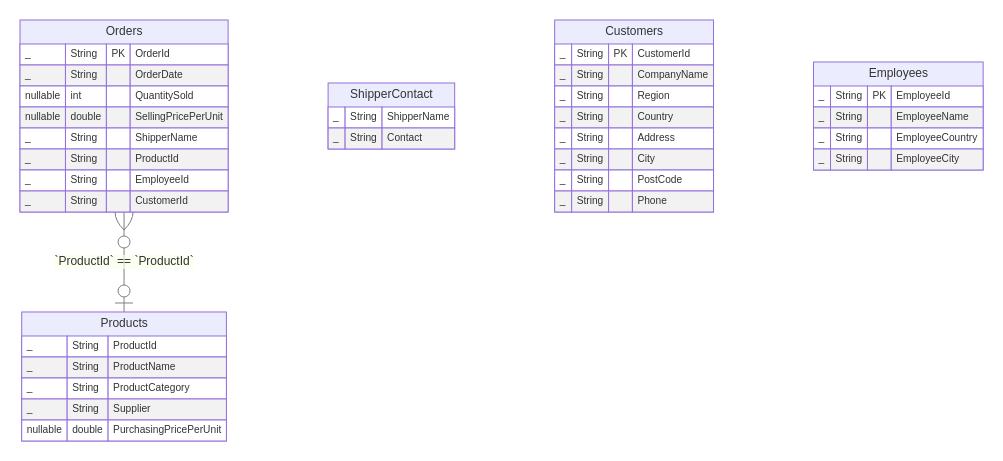

In [21]:
session.tables.schema

Do we need to define our mapping? Let's try joining the employee and customer tables to orders, without specifying how.

In [22]:
orders.join(employees)
orders.join(customers)

And now our schema looks like:

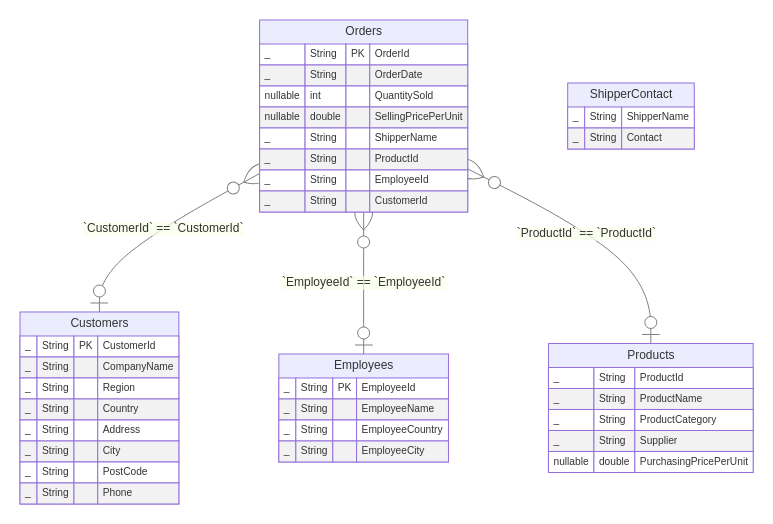

In [23]:
session.tables.schema

And why did we spend so much time on those keys?

Try uncommenting and running the below cell ...

In [24]:
# orders.join(shipperContact)

... and you'll get the following error.  

<img src="https://s3.eu-west-3.amazonaws.com/data.atoti.io/notebooks/table-creation-and-data-loads/images/no-keys.png"></a></div>  

Yikes. We get that yuckiness because we never set up any keys for _shipperContact_.  

When inferring how to join tables, Atoti looks for matched column names among the defined keys. We can still join these tables, we'll just have to set the mapping to do so.

In [25]:
orders.join(shipperContact, orders["ShipperName"] == shipperContact["ShipperName"])

And voila, our data modeling is complete!

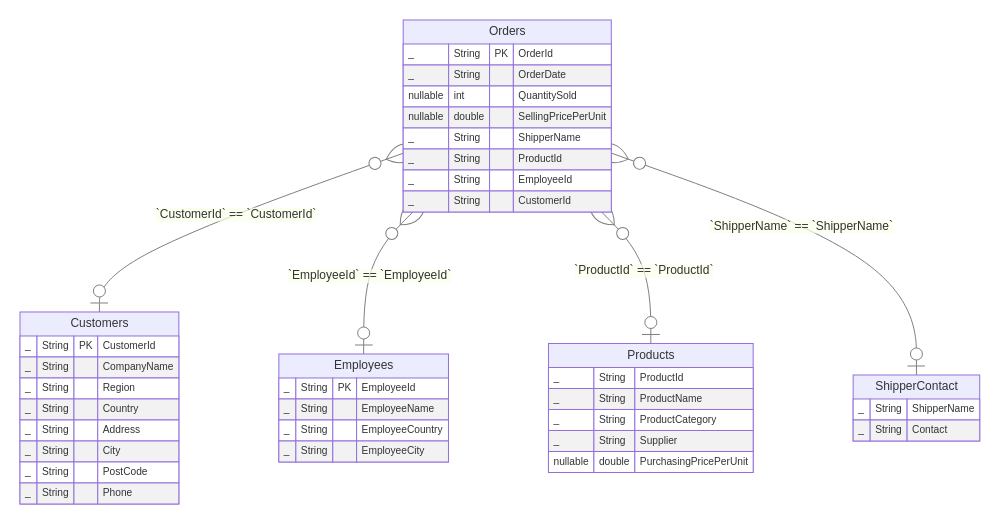

In [26]:
session.tables.schema

We hope this guide helps you with your table creation and data loading needs.
Want to explore more data? Check out our other guides here on our GitHub repository: [github.com/atoti/atoti/tree/main/02-technical-guides](https://github.com/atoti/atoti/tree/main/02-technical-guides) or read our guides on our website: [atoti.io/articles](https://www.atoti.io/articles/)

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=table-creation-and-data-loads" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Try Atoti"></a></div>